[View in Colaboratory](https://colab.research.google.com/github/tcglarry/alibaba_manufacturing_competition/blob/master/ali_xgb1_2_stage_train_dense_autoencoder.ipynb)

In [0]:
!source activate inpainting-style

[View in Colaboratory](https://colab.research.google.com/github/tcglarry/alibaba_manufacturing_competition/blob/master/ali_xgb_densenet121.ipynb)

In [1]:
"""For Alibaba Competition

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/10DYDNSM_eaFtn7lrM0CyUIXRFdIDtabS
"""

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse






Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


In [3]:

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


KeyboardInterrupt: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
aoi_aoi_test1.ipynb  Sample upload.txt
aoi_test	     TAHU PowerPoint Template.pdf
Colab Notebooks      TAHU PowerPoint Template - 柱狀圖 1.ods
kaggle		     tai_future_data
mobilenet_ssd	     test for excel
PiXNet		     Untitled0.ipynb


In [0]:
!ls drive/kaggle/ali/manu_big_data

train_sample_total.zip	xgb_densenet12.pkl


In [0]:
!cp 'drive/My Drive/kaggle/ali/train_data_img_preprocess_MobileNetV2_2.npy' .

In [1]:


import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import subprocess
import os
import pickle
import sklearn 

from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier




import keras.backend as K

from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
#from keras.applications.mobilenet import MobileNet
#from keras.applications.mobilenetv2 import MobileNetV2
#from keras.applications.nasnet import NASNetMobile,NASNetLarge
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img



from keras.applications.xception import Xception, preprocess_input

from keras.layers import Dense, GlobalAveragePooling2D,Flatten
from keras.layers import Input, Conv2D, MaxPooling2D, merge, Lambda,UpSampling2D, concatenate, Reshape, Dropout,Cropping2D,Activation
from keras.models import Model, load_model
import pandas as pd

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import Callback


from keras import regularizers
#from dummyPy import OneHotEncoder
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

import itertools
import time

Using TensorFlow backend.


In [0]:
src_1= 'drive/My Drive/kaggle/ali/'
src_2= 'manu_big_data/train_sample_total/'
src_now = ''

In [3]:

with open(src_1+'train_file_list.pkl', 'rb') as handle:
    file_list = pickle.load(handle)
file_list

['擦花20180915103657对照样本_02.jpg',
 '不导电20180831104052对照样本_02.jpg',
 '正常20180915160551对照样本_02.jpg',
 '漏底20180901093238对照样本_01.jpg',
 '脏点20180831094339对照样本_02.jpg',
 '碰伤20180905092205对照样本_02.jpg',
 '漏底20180901092930对照样本_01.jpg',
 '漏底20180901094051对照样本_01.jpg',
 '其他_碰凹20180901103553对照样本_01.jpg',
 '桔皮20180830161610对照样本_02.jpg',
 '正常20180915162206对照样本_02.jpg',
 '正常20180914111132对照样本_02.jpg',
 '正常20180914100402对照样本_02.jpg',
 '脏点20180910093014对照样本_02.jpg',
 '正常20180913142335对照样本_02.jpg',
 '桔皮20180912164946对照样本_02.jpg',
 '横条压凹20180903111119对照样本_02.jpg',
 '漏底20180901093238对照样本_02.jpg',
 '正常20180915162424对照样本_02.jpg',
 '漏底20180901094932对照样本_01.jpg',
 '擦花20180831110728对照样本_02.jpg',
 '正常20180915155619对照样本_02.jpg',
 '漏底20180901095216对照样本_02.jpg',
 '正常20180914090615对照样本_02.jpg',
 '其他_打白点20180907145432对照样本_02.jpg',
 '凸粉20180901101551对照样本_01.jpg',
 '正常20180915143826对照样本_02.jpg',
 '正常20180914102027对照样本_02.jpg',
 '凸粉20180901110638对照样本_01.jpg',
 '其他_打白点20180907144456对照样本_02.jpg',
 '其他_铝屑20180911142100对照样本_

In [4]:
with open(src_1+'train_label_data.pkl', 'rb') as handle:
    label_data = pickle.load(handle)
print (label_data.shape)
label_data

(2386,)


array([ 2,  1,  0, ..., 10,  8,  2])

In [5]:

with open(src_1+'failure_to_label.pkl', 'rb') as handle:
    label_dict = pickle.load(handle)
label_dict  


{'不导': 1,
 '其他': 11,
 '凸粉': 8,
 '擦花': 2,
 '桔皮': 4,
 '横条': 3,
 '正常': 0,
 '涂层': 9,
 '漏底': 5,
 '碰伤': 6,
 '脏点': 10,
 '起坑': 7}

In [6]:
train_data = np.load(src_now+'train_data_img_preprocess_MobileNetV2_2.npy')
train_data.shape

(2386, 60, 80, 32)

In [7]:
failure_list = label_data !=0
print (sum(failure_list))  # 正常: 1018, 2386-1018 = 1368
failure_list

1368


array([ True,  True, False, ...,  True,  True,  True])

In [8]:
label_data_2 = label_data[failure_list]
sum(label_data_2==0)

0

In [9]:
train_data_2 = train_data[failure_list,:]
train_data_2.shape

(1368, 60, 80, 32)

In [10]:
# one hot encoding for label (for later NN usage)

one_hot_label_data_2 = to_categorical(label_data_2 - 1)
print (one_hot_label_data_2.shape)
one_hot_label_data_2[:10]


(1368, 11)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [0]:
train_x,val_x,train_y,val_y = train_test_split(train_data_2,one_hot_label_data_2,test_size=0.3,shuffle=True)

In [12]:
print (train_x.shape)

(957, 60, 80, 32)


In [0]:

def conv_block(ch, strides, activation= 'relu', padding='same',kernel_regularizer=regularizers.l2(0.01)):
    return Conv2D(ch,(3,3), strides=strides, activation= activation, padding =padding , kernel_regularizer= kernel_regularizer)


In [0]:
def build_model_6(ch=8):
    #inputs = Input((IMAGE_HEIGHT,IMAGE_WIDTH,ch))
    inputs = Input((60,80,32))

    #conv0 = Conv2D(32,(2,2),padding='valid')(inputs)
    #print ('conv0',conv0.get_shape())
    conv1 =  conv_block(ch,(1,1))(inputs)
    conv1 = conv_block(ch,(1,1))(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    print ('pool1',pool1.get_shape())

    conv2 =  conv_block(ch*2,(1,1))(pool1)
    conv2 = conv_block(ch*4,(1,1))(conv2)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    print ('poo12',pool2.get_shape())

    '''
    conv3 =  conv_block(ch*4)(conv_test)
    conv3 = conv_block(ch*4)(conv3)
    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
    print ('poo13',pool3.get_shape())

    conv4 =  conv_block(ch*8)(pool3)
    conv4 = conv_block(ch*8)(conv4)
    pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
    print ('poo14',pool4.get_shape())
    '''
    
    conv5 =  conv_block(ch*8,(1,1))(pool2)
    conv5 = conv_block(ch*16,(5,5))(conv5)


    conv_embedding = Conv2D(256, (3,3),strides=(3,4), activation= 'relu', padding ='valid' )(conv5)
    
    flatten_x = Flatten()(conv_embedding)

    conv_embedding_2 = Dense(64)(flatten_x)
    
    conv_embedding_3 =Dropout(0.2)(conv_embedding_2)
    
    outputs = Dense(11,activation='softmax')(conv_embedding_3)



    model = Model(inputs= inputs, outputs=outputs)
    model.summary()

    return model

In [21]:
model_6 = build_model_6()

pool1 (?, 30, 40, 8)
poo12 (?, 15, 20, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 80, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 80, 8)         2312      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 80, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 40, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 40, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (Non

In [23]:
model_6.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint(src_1+'conv_for_defect_11.h5')
earlystop = EarlyStopping(monitor='val_loss',  patience=10,  mode='auto')
#callback_list = [cbk, checkpoint]
callback_list = [checkpoint,earlystop]

model_6.fit(x=train_data_2, y=one_hot_label_data_2, batch_size=32, epochs=300, verbose=1, callbacks=callback_list, validation_split=0.2, shuffle=True)


Train on 1094 samples, validate on 274 samples
Epoch 1/300
1094/1094 [==============================] - 2s 2ms/step - loss: 0.4233 - acc: 0.9506 - val_loss: 1.0399 - val_acc: 0.7920
Epoch 2/300
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3353 - acc: 0.9735 - val_loss: 1.0363 - val_acc: 0.8504
Epoch 3/300
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3212 - acc: 0.9790 - val_loss: 1.1361 - val_acc: 0.7701
Epoch 4/300
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3235 - acc: 0.9771 - val_loss: 1.0422 - val_acc: 0.8285
Epoch 5/300
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3676 - acc: 0.9598 - val_loss: 1.0285 - val_acc: 0.8066
Epoch 6/300
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3321 - acc: 0.9726 - val_loss: 1.1912 - val_acc: 0.8175
Epoch 7/300
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3873 - acc: 0.9488 - val_loss: 1.0558 - val_acc: 0.8248
Epoch 8/

In [24]:
model_6.evaluate(val_x,val_y)

411/411 [==============================] - 0s 807us/step


[0.3957134185046175, 0.9537712885225487]

In [0]:
def build_model_7(ch=8):
    #inputs = Input((IMAGE_HEIGHT,IMAGE_WIDTH,ch))
    inputs = Input((60,80,32))

    #conv0 = Conv2D(32,(2,2),padding='valid')(inputs)
    #print ('conv0',conv0.get_shape())
    x =  Flatten()(inputs)
    x= Dense(1024, activation='relu')(x)
    bottleneck= Dense (256,activation='relu')(x)

    y= Dense (1024,activation='relu')(bottleneck)
    y= Dense (60*80*32,activation='relu')(y)
    print (y.get_shape())

    outputs = Reshape(target_shape=(60,80,32))(y)


    
    print (outputs.get_shape())

    model = Model(inputs= inputs, outputs=outputs)
    model.summary()
    return model


In [14]:
model_7 = build_model_7()

(?, 153600)
(?, 60, 80, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 80, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 153600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              157287424 
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_4 (Dense)              (None, 153600)            157440000 
_________________________________________________________________
reshape_1 (Reshape)          (None, 60, 80, 32) 

In [0]:

def gram_matrix(x):
  #features = K.batch_flatten(K.permute_dimensions(x[0], (2, 0, 1)))
  x = K.batch_flatten(x)
  gram = K.dot(x, K.transpose(x))
  print(gram)
  #return K.expand_dims(gram, axis=0)
  return gram
  


def my_loss(y_true,y_pred):
  loss_1 = K.mean(K.square(y_pred - y_true), axis=-1)
  
  #loss_2= K.categorical_crossentropy(gram_matrx(y_true), gram_matrix(y_pred))
  loss_2 = K.mean(K.square(gram_matrix(y_pred) - gram_matrix(y_true)))
  
  total_loss = loss_1 * 1.0 + loss_2 **0.0001
  return total_loss

In [16]:
model_7.compile (optimizer='Adam', loss = my_loss, metrics =['mae'])

Tensor("loss/reshape_1_loss/MatMul:0", shape=(?, ?), dtype=float32)
Tensor("loss/reshape_1_loss/MatMul_1:0", shape=(?, ?), dtype=float32)


In [17]:
model_7.compile(optimizer='Adam',loss='mse')

checkpoint = ModelCheckpoint(src_1+'model_for_defect_ae_gram.h5')
earlystop = EarlyStopping(monitor='val_loss',  patience=10,  mode='auto')
#callback_list = [cbk, checkpoint]
callback_list = [checkpoint,earlystop]

model_7.fit(x=train_data_2, y=train_data_2, batch_size=32, epochs=300, verbose=1, callbacks=callback_list, validation_split=0.2, shuffle=True)


Train on 1094 samples, validate on 274 samples
Epoch 1/300
1094/1094 [==============================] - 26s 24ms/step - loss: 37.2361 - val_loss: 20.0245
Epoch 2/300
1094/1094 [==============================] - 16s 15ms/step - loss: 20.2070 - val_loss: 19.7673
Epoch 3/300
1094/1094 [==============================] - 16s 14ms/step - loss: 19.9813 - val_loss: 19.6788
Epoch 4/300
1094/1094 [==============================] - 16s 15ms/step - loss: 19.8691 - val_loss: 19.5513
Epoch 5/300
1094/1094 [==============================] - 16s 14ms/step - loss: 19.7520 - val_loss: 19.5221
Epoch 6/300
1094/1094 [==============================] - 16s 14ms/step - loss: 19.6364 - val_loss: 19.3806
Epoch 7/300
1094/1094 [==============================] - 16s 14ms/step - loss: 19.4662 - val_loss: 19.1926
Epoch 8/300
1094/1094 [==============================] - 16s 14ms/step - loss: 19.1792 - val_loss: 18.8115
Epoch 9/300
1094/1094 [==============================] - 16s 14ms/step - loss: 18.7656 - val_loss

KeyboardInterrupt: ignored

In [0]:
def build_model_7_2(base_model):
    inputs = base_model.input
    base_output = base_model.layers[3].output
    
    print (base_output.get_shape())
    
    x = Dense(128, activation='relu',use_bias= True)(base_output)
    #x = Dropout(0.2)(x)
    x = Dense(64 , activation='relu',use_bias= True)(x)
    #x = Dropout(0.2)(x)
    outputs = Dense(11 , activation='softmax',use_bias= True)(x)
    model = Model(inputs = inputs, outputs=outputs)
    model.summary()
    return model

In [24]:
model_7_2 = build_model_7_2(model_7)

(?, 256)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 80, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 153600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              157287424 
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 11)                715       
T

In [23]:
for layer in model_7_2.layers[:4]:
  layer.trainable=False
  print (layer.name)

input_1
flatten_1
dense_1
dense_2


In [25]:
model_7_2.compile (optimizer='Adam',loss='categorical_crossentropy',metrics = ['accuracy'])

checkpoint = ModelCheckpoint(src_1+'classification_for_defect.h5')
earlystop = EarlyStopping(monitor='val_loss',  patience=10,  mode='auto')
#callback_list = [cbk, checkpoint]
callback_list = [checkpoint,earlystop]

model_7_2.fit(x=train_x, y=train_y, batch_size=32, epochs=300, verbose=1, callbacks=callback_list, validation_split=0.2, shuffle=True)


Train on 765 samples, validate on 192 samples
Epoch 1/300
765/765 [==============================] - 2s 2ms/step - loss: 14.1165 - acc: 0.1242 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 2/300
765/765 [==============================] - 1s 2ms/step - loss: 14.1165 - acc: 0.1242 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 3/300
765/765 [==============================] - 1s 1ms/step - loss: 14.1165 - acc: 0.1242 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 4/300
765/765 [==============================] - 1s 1ms/step - loss: 14.1165 - acc: 0.1242 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 5/300
765/765 [==============================] - 1s 1ms/step - loss: 14.1165 - acc: 0.1242 - val_loss: 14.4391 - val_acc: 0.1042
Epoch 6/300
736/765 [===========================>..] - ETA: 0s - loss: 14.1690 - acc: 0.1209

KeyboardInterrupt: ignored

---

---

In [0]:

def build_model_4(ch=32):
    #inputs = Input((IMAGE_HEIGHT,IMAGE_WIDTH,ch))
    inputs = Input((60,80,32))

    #conv0 = Conv2D(32,(2,2),padding='valid')(inputs)
    #print ('conv0',conv0.get_shape())
    conv1 =  conv_block(ch)(inputs)
    conv1 = conv_block(ch)(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    print ('pool1',pool1.get_shape())

    conv2 =  conv_block(ch*2)(pool1)
    conv2 = conv_block(ch*2)(conv2)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    print ('poo12',pool2.get_shape())

    '''
    conv3 =  conv_block(ch*4)(conv_test)
    conv3 = conv_block(ch*4)(conv3)
    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
    print ('poo13',pool3.get_shape())

    conv4 =  conv_block(ch*8)(pool3)
    conv4 = conv_block(ch*8)(conv4)
    pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
    print ('poo14',pool4.get_shape())
    '''
    
    conv5 =  conv_block(ch*8)(pool2)
    conv5 = conv_block(ch*8)(conv5)


    up6 = concatenate([UpSampling2D(size=(2,2))(conv5), conv2], axis=3)
    conv6 = conv_block(ch*8)(up6)
    conv6 = conv_block(ch*8)(conv6)

    up7 = concatenate ([UpSampling2D(size=(2,2))(conv6), conv1],  axis=3)
    conv7 = conv_block(ch*4)(up7)
    conv7 = conv_block(ch)(conv7)
    print ('conv7',conv7.get_shape())

    '''
    conv7 = Conv2DTranspose(ch*4,(2,2),padding='valid')(conv7)
    print ('conv7',conv7.get_shape())

    up8 = concatenate([UpSampling2D(size=(2,2))(conv7), conv2], axis=3)
    conv8 = conv_block(ch*2)(up8)
    conv8 = conv_block(ch*2)(conv8)

    up9 = concatenate([UpSampling2D(size=(2,2))(conv8), conv1],  axis=3)
    conv9 = conv_block(ch)(up9)
    conv9 = conv_block(ch)(conv9)



    conv10 = Conv2D(1,(1,1))(conv9)
    '''


    model = Model(inputs= inputs, outputs=conv7)
    model.summary()

    return model

In [0]:
model_4 = build_model_4()

pool1 (?, 30, 40, 32)
poo12 (?, 15, 20, 64)
conv7 (?, 60, 80, 32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 60, 80, 32)   0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 60, 80, 32)   9248        input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 60, 80, 32)   9248        conv2d_41[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 30, 40, 32)   0           conv2d_42[0][0]                  
___________________________________________

In [0]:
model_4.compile(optimizer='Adam',loss='mse')

checkpoint = ModelCheckpoint(src_save+'dense_for_defect_ae.h5')
earlystop = EarlyStopping(monitor='val_loss',  patience=10,  mode='auto')
#callback_list = [cbk, checkpoint]
callback_list = [checkpoint,earlystop]

model_4.fit(x=train_data_2, y=train_data_2, batch_size=32, epochs=300, verbose=1, callbacks=callback_list, validation_split=0.2, shuffle=True)


In [0]:
def build_model_1():
    inputs = Input((60,80,32))
    x = Flatten()(inputs)
    x = Dense(512, activation='relu',use_bias= True)(inputs)
    
    x = Dense(384, activation='relu',use_bias= True)(x)
    #x = Dropout(0.2)(x)
    x = Dense(256 , activation='relu',use_bias= True)(x)
    #x = Dropout(0.2)(x)

    
    x = Dense(512 , activation='relu',use_bias= True)(x)
    outputs = Dense(1280 , activation='linear',use_bias= True)(x)
    model = Model(inputs = inputs, outputs=outputs)
    model.summary()
    return model 

In [0]:
model_1 = build_model_1()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1280)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 1024)              1311744   
_________________________________________________________________
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_57 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_58 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_59 (Dense)             (None, 1280)              656640    
Total params: 2,756,096
Trainable params: 2,756,096
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='Adam',loss='mse')

In [0]:

checkpoint = ModelCheckpoint(src_save+'dense_for_defect_ae.h5')
earlystop = EarlyStopping(monitor='val_loss',  patience=10,  mode='auto')
#callback_list = [cbk, checkpoint]
callback_list = [checkpoint,earlystop]

model_1.fit(x=train_data_2, y=train_data_2, batch_size=32, epochs=300, verbose=1, callbacks=callback_list, validation_split=0.2, shuffle=True)



Train on 1094 samples, validate on 274 samples
Epoch 1/300
1094/1094 [==============================] - 4s 4ms/step - loss: 0.1243 - val_loss: 0.0384
Epoch 2/300
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0334 - val_loss: 0.0229
Epoch 3/300
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0214 - val_loss: 0.0170
Epoch 4/300
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0168 - val_loss: 0.0149
Epoch 5/300
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0142 - val_loss: 0.0132
Epoch 6/300
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0119 - val_loss: 0.0104
Epoch 7/300
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 8/300
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 9/300
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 10/300
1094/1094 [==

In [0]:
ae_model = load_model (src_save+'dense_for_defect_ae.h5')


In [0]:
def build_model_2(base_model):
    inputs = base_model.input
    base_output = base_model.layers[-3].output
    
    x = Dense(128, activation='relu',use_bias= True)(base_output)
    #x = Dropout(0.2)(x)
    x = Dense(64 , activation='relu',use_bias= True)(x)
    #x = Dropout(0.2)(x)
    outputs = Dense(11 , activation='softmax',use_bias= True)(x)
    model = Model(inputs = inputs, outputs=outputs)
    model.summary()
    return model

In [0]:
model_2 = build_model_2(ae_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1280)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 1024)              1311744   
_________________________________________________________________
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_57 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_65 (Dense)             (None, 11)                715       
Total para

In [0]:
for layer in model_2.layers[:4]:
    layer.trainable=False
    print (layer.name)

input_7
dense_55
dense_56
dense_57


In [0]:
model_2.compile(optimizer='Adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:

checkpoint = ModelCheckpoint(src_save+'dense_for_defect.h5')
earlystop = EarlyStopping(monitor='val_loss',  patience=10,  mode='auto')
#callback_list = [cbk, checkpoint]
callback_list = [checkpoint,earlystop]

model_2.fit(x=train_x, y=train_y, batch_size=32, epochs=300, verbose=1, callbacks=callback_list, validation_split=0.2, shuffle=True)



Train on 765 samples, validate on 192 samples
Epoch 1/300
765/765 [==============================] - 1s 2ms/step - loss: 1.9005 - acc: 0.4026 - val_loss: 1.6852 - val_acc: 0.4635
Epoch 2/300
765/765 [==============================] - 0s 463us/step - loss: 1.3005 - acc: 0.6013 - val_loss: 1.3531 - val_acc: 0.5833
Epoch 3/300
765/765 [==============================] - 0s 544us/step - loss: 1.0076 - acc: 0.7242 - val_loss: 1.1643 - val_acc: 0.6198
Epoch 4/300
765/765 [==============================] - 0s 560us/step - loss: 0.8212 - acc: 0.7516 - val_loss: 1.0448 - val_acc: 0.6354
Epoch 5/300
765/765 [==============================] - 0s 557us/step - loss: 0.7171 - acc: 0.7804 - val_loss: 0.9412 - val_acc: 0.6458
Epoch 6/300
765/765 [==============================] - 0s 546us/step - loss: 0.6377 - acc: 0.7961 - val_loss: 0.9065 - val_acc: 0.6823
Epoch 7/300
765/765 [==============================] - 0s 544us/step - loss: 0.5830 - acc: 0.8052 - val_loss: 0.8216 - val_acc: 0.7344
Epoch 8/300

In [0]:
model_2.evaluate(val_x,val_y)

411/411 [==============================] - 0s 362us/step


[0.6369881242006075, 0.8150851575707577]

In [0]:
def build_model_3():
    inputs = Input((1280,))
    x = Dense(1024, activation='relu',use_bias= True)(inputs)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu',use_bias= True)(x)
    x = Dropout(0.2)(x)


    
    x = Dense(128 , activation='relu',use_bias= True)(x)
    outputs = Dense(11 , activation='softmax',use_bias= True)(x)
    model = Model(inputs = inputs, outputs=outputs)
    model.summary()
    return model 

In [0]:
model_3 = build_model_3()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 1280)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 1024)              1311744   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_73 (Dense)             (None, 11)                1419      
Total para

In [0]:
model_3.compile(optimizer='Adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(src_save+'dense_for_defect_3.h5')
earlystop = EarlyStopping(monitor='val_loss',  patience=10,  mode='auto')
#callback_list = [cbk, checkpoint]
callback_list = [checkpoint,earlystop]

model_3.fit(x=train_x, y=train_y, batch_size=32, epochs=300, verbose=1, callbacks=callback_list, validation_split=0.2, shuffle=True)



Train on 765 samples, validate on 192 samples
Epoch 1/300
765/765 [==============================] - 3s 3ms/step - loss: 1.8127 - acc: 0.4052 - val_loss: 1.3913 - val_acc: 0.5417
Epoch 2/300
765/765 [==============================] - 1s 2ms/step - loss: 1.1361 - acc: 0.6209 - val_loss: 1.2102 - val_acc: 0.5573
Epoch 3/300
765/765 [==============================] - 1s 2ms/step - loss: 0.8781 - acc: 0.7046 - val_loss: 0.9831 - val_acc: 0.6667
Epoch 4/300
765/765 [==============================] - 1s 2ms/step - loss: 0.7776 - acc: 0.7203 - val_loss: 0.9502 - val_acc: 0.6146
Epoch 5/300
765/765 [==============================] - 1s 2ms/step - loss: 0.6485 - acc: 0.7739 - val_loss: 0.8030 - val_acc: 0.7188
Epoch 6/300
765/765 [==============================] - 1s 2ms/step - loss: 0.5901 - acc: 0.7948 - val_loss: 0.7330 - val_acc: 0.7604
Epoch 7/300
765/765 [==============================] - 1s 2ms/step - loss: 0.5187 - acc: 0.8118 - val_loss: 0.7668 - val_acc: 0.7344
Epoch 8/300
765/765 [==

In [0]:
model_3.evaluate(val_x,val_y)

411/411 [==============================] - 0s 418us/step


[0.7349703504438818, 0.8004866184399366]

In [0]:
prediction = np.argmax(model.predict(val_x),axis=1)+1


In [0]:
cm_y  = np.argmax(val_y,axis=1)+1

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = confusion_matrix(cm_y, prediction)

In [0]:
label_list = [i for i in range(1,12)]
label_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Confusion matrix, without normalization
[[ 10   0   0   3   0   0   0   0   0   0   1]
 [  0  30   0   0   0   1   0   1   0   0   1]
 [  0   0  11   0   0   0   0   0   0   0   0]
 [  0   0   0  23   1   0   0   0   0   0   0]
 [  0   0   0   0 123   0   0   0   0   0   1]
 [  0   2   0   0   0  18   0   0   0   2   1]
 [  0   0   0   0   0   0  21   0   0   0   0]
 [  0  12   0   0   0   0   0  32   0   1   0]
 [  0   2   0   0   0   0   0   0  13   0   1]
 [  0   0   0   1   0   0   0   0   0  48   5]
 [  0   5   0   0   1   0   0   0   0   8  32]]


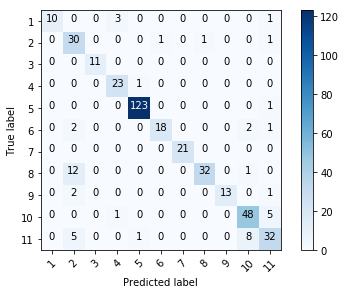

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_list)

In [0]:
from sklearn.metrics import classification_report
print (classification_report(cm_y,prediction))

             precision    recall  f1-score   support

          1       1.00      0.71      0.83        14
          2       0.59      0.91      0.71        33
          3       1.00      1.00      1.00        11
          4       0.85      0.96      0.90        24
          5       0.98      0.99      0.99       124
          6       0.95      0.78      0.86        23
          7       1.00      1.00      1.00        21
          8       0.97      0.71      0.82        45
          9       1.00      0.81      0.90        16
         10       0.81      0.89      0.85        54
         11       0.76      0.70      0.73        46

avg / total       0.90      0.88      0.88       411



In [0]:
from sklearn import metrics
print (metrics.classification_report(val_y,predictions))

             precision    recall  f1-score   support

          1       1.00      0.75      0.86         4
          2       0.78      0.78      0.78        40
          3       1.00      1.00      1.00         8
          4       0.94      1.00      0.97        17
          5       0.98      1.00      0.99        92
          6       1.00      0.62      0.76        13
          7       1.00      1.00      1.00         6
          8       0.94      0.83      0.88        18
          9       1.00      1.00      1.00         8
         10       0.73      0.93      0.82        29
         11       0.89      0.82      0.85        39

avg / total       0.91      0.90      0.90       274



In [0]:
with open (src_1+'xgb_binary_stage_2.pkl','wb') as handle:
    pickle.dump(xgb1,handle)
print ('stage_2, xgb1 saved')

stage_2, xgb1 saved


In [0]:
print (predictions)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 

In [0]:
# build model , using pre-trained Xception, include top = True
def build_model():
    inputs = Input(shape=(1920,2560,3))
    #inputs = Input(shape=(224,224,3))
    #inputs = Lambda(lambda x: x/275. - 1.0)(inputs)
    # create the base pre-trained model
    #base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    base_model = MobileNetV2(weights='imagenet',input_tensor=inputs,  include_top=True)
    
    x = base_model.output
    print (x.get_shape)
    model = Model(inputs=base_model.input, outputs=x)
    model.summary()
    
    return model

In [0]:
model_1 = build_model()
# compile the model (should be done *after* setting layers to non-trainable)
model_1.compile(optimizer='Nadam', loss='categorical_crossentropy',metrics=['accuracy'])

<bound method Tensor.get_shape of <tf.Tensor 'Logits/Softmax:0' shape=(?, 1000) dtype=float32>>
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1920, 2560, 3 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 960, 1280, 32 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 960, 1280, 32 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (Activation)         (None, 960, 1280, 32 0           bn_Conv1[0][0]                   
_____________

In [0]:
model_1.save('MobileNetV2.h5')

In [0]:
def build_model():
    inputs = Input(shape=(1920,2560,3))
    #inputs = Input(shape=(224,224,3))
    #inputs = Lambda(lambda x: x/275. - 1.0)(inputs)
    # create the base pre-trained model
    #base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    base_model = MobileNetV2(weights='imagenet',input_tensor=inputs,  include_top=True)
    
    x = base_model.output
    model_1_out = base_model.layers[-2].output

 
  
    model_1 = Model(inputs=base_model.input, outputs=model_1_out)
    model_1.summary()
    
    
    print ('\n\n*******************************=============================')
    model_2_out = base_model.layers[51].output
    
    model_2 = Model(inputs=base_model.input, outputs=model_2_out)
    
    model_2.summary()
    
    return model_1,model_2






In [0]:
model_1, model_2 = build_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1920, 2560, 3 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 960, 1280, 32 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 960, 1280, 32 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (Activation)         (None, 960, 1280, 32 0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_c

for i, layer in enumerate(model_1.layers):
    print (f'layer ({i}) layer name is {layer.name}')


checkpoint = ModelCheckpoint(filepath=src_1+'defect_non_defect_dense.h5', monitor = 'val_loss', save_best_only=True, mode= 'auto')
earlystop = EarlyStopping(patience=10)
callback_list = [checkpoint, earlystop]
model_1.fit(x=train_x, y=train_y, batch_size=32, epochs=300, callbacks = callback_list, verbose=1, validation_split=0.2,  shuffle=True)


In [0]:

img_list = []
for i,img in enumerate(file_list):
    img = load_img(src_2+img)  # an PIL instance
    x = img_to_array(img) # convert PIL to numpy array
    x = preprocess_input(x)
    img_list.append(x)
    
    if i % 100 ==0:
        print (f'{i} images read ')
    
train_img_array =  np.concatenate(img_list)
print (train_img_array.shape)


np.save(src_1+'train_img_array.npy',train_img_array)
    
print ('image read comleted, converted to nhumpy and saved')

0 images read 
100 images read 


TypeError: float() argument must be a string or a number, not 'JpegImageFile'

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

pred_temp_1 = model_1.predict(train_img_array)
print ('prediction model_1 completed, prediction shape', pred_temp_1.shape)
np.save(src_1+'train_img_model_1.npy',pred_temp_1)



In [0]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
pred_temp_2 = model_2.predict(train_img_array)
print ('prediction model_2 completed, prediction shape', pred_temp_2.shape)
np.save(src_1+'train_img_model_2.npy',pred_temp_2)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = confusion_matrix(val_y, predictions)

Confusion matrix, without normalization
[[181  89]
 [146  62]]


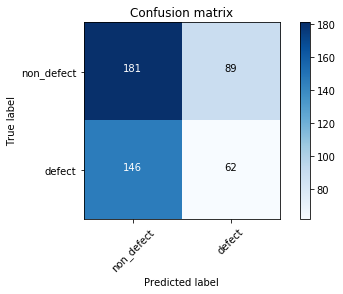

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

In [0]:
import pickle
with open (src_save+'xgb_densenet12_correct.pkl','wb') as handle:
  pickle.dump(xgb1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
print (val_x.shape, val_y.shape)

(478, 1000) (478,)


In [0]:
print (predictions)

[0, 0, 0, 0, 5, 5, 0, 4, 0, 8, 0, 5, 0, 0, 4, 11, 0, 2, 0, 5, 0, 0, 0, 0, 5, 5, 0, 5, 2, 5, 0, 7, 0, 4, 11, 5, 0, 0, 0, 0, 5, 0, 0, 9, 11, 0, 0, 0, 6, 5, 0, 5, 5, 1, 10, 5, 2, 0, 8, 0, 5, 5, 5, 0, 5, 0, 6, 10, 0, 5, 0, 0, 2, 0, 0, 10, 0, 2, 5, 4, 1, 0, 0, 0, 2, 3, 0, 0, 8, 5, 10, 5, 0, 10, 10, 11, 5, 2, 5, 0, 0, 0, 10, 1, 0, 3, 8, 2, 8, 4, 5, 5, 0, 0, 2, 0, 0, 11, 10, 0, 0, 10, 5, 0, 0, 0, 0, 11, 4, 0, 1, 0, 10, 2, 5, 0, 0, 0, 0, 2, 11, 0, 0, 0, 2, 0, 0, 10, 0, 11, 0, 2, 0, 5, 0, 0, 0, 0, 0, 5, 6, 11, 0, 3, 7, 10, 0, 5, 5, 0, 5, 8, 0, 5, 0, 0, 5, 5, 0, 11, 6, 0, 8, 10, 0, 10, 0, 5, 0, 0, 5, 5, 0, 0, 6, 0, 1, 0, 5, 0, 8, 0, 5, 0, 8, 5, 5, 8, 0, 10, 0, 0, 5, 0, 11, 0, 0, 4, 5, 0, 0, 0, 0, 2, 5, 5, 3, 0, 7, 0, 6, 7, 0, 0, 0, 5, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 7, 2, 0, 5, 0, 0, 5, 10, 0, 0, 0, 0, 5, 1, 5, 10, 10, 5, 0, 10, 8, 11, 0, 6, 0, 0, 10, 5, 0, 0, 5, 2, 0, 5, 8, 0, 0, 5, 11, 0, 0, 2, 0, 4, 5, 2, 5, 0, 0, 5, 8, 0, 10, 5, 0, 0, 4, 3, 11, 8, 0, 0, 0, 10, 5, 0, 0, 0, 0, 0, 1, 

In [0]:
print (val_y)

[ 0  0  5  0  5  5  0  4  0  8  0  5  0  0  4 11  0  2  0  5  0  0  0  0
  5  5  0  5 10  5  0  7  0  4 11  5  0  0  0  0  5  0  2  9 11  0  0  0
  6  5  0  5  5  1  6  5  2  0  8  0  5  5  5  0  5  0  6 10  0  5  0  0
  2  0  0 10  2  2  5  4  6  0  0  0  2  3  0  0  8  5 10  5  0 10 11 11
  5  2  5  0  0  0  0  1  0  3  8  2  8  4  5  5  0  0  2  0  0 11 10  0
  0  6  5  0  0  0  0 11  4  0 11  0 10  2  5  2  0  0  0  2 11  0  0  0
  2  0  0 10  0 10  0  2 11  5  0  0  0  0  0  5  6  6  0  3  7 10  0  5
  5  0  5  8  0  5  0  0  5  5  0 11  6  0  8 10  0 10  0  5  0  0  5  5
  0  0  6  0  1  0  5  0  8  0  5  0  8  5  5  8  0 10  0  0  5  0 11  0
  0  4  5  0  0  0  0  2  5  5  3  0  7  0  6  7  0  0  0  5  0  4  0  5
 11  0  0  0  0  0  3  5  0  0  7  2  0  5  0  0  5 10  0  0  0  0  1  1
  5 10 10  5  0 10  8 11  0  8  0  7  6  5  0  0  5  2  0  5  8  0  7  5
 11  0  0  2  9  4  5  2  5 10  0  5  8  0 10  4  0  0  4  3 11  8  0  0
  0 10  5  0  0  0  0  0  1  5  0  0  0  0  6  0  7

failure_to_label.pkl   manu_big_data		Untitled0.ipynb
label_to_category.pkl  train_data_densenet.npy	xgb_densenet12.pkl


In [0]:
label_data_0

array([ True, False, False, ..., False,  True,  True])

In [0]:
class_names= np.array(['non_defect','defect'])

In [0]:
class_names

array(['non_defect', 'defect'], dtype='<U10')

In [0]:
from PIL import Image
img = Image.open('manu_big_data/train_sample_total/'+file_list[0])
img = img.resize((1920//4, 2560//4))

NameError: name 'file_list' is not defined